In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# central limit theorom and law of large number

In [33]:
np.random.seed(42)
n_samples = 1000
sample_size = 30

In [34]:
# generate data
data = np.random.randint(1, 10, (n_samples, sample_size))
#calc sample means
sample_means = np.mean(data, axis=1)

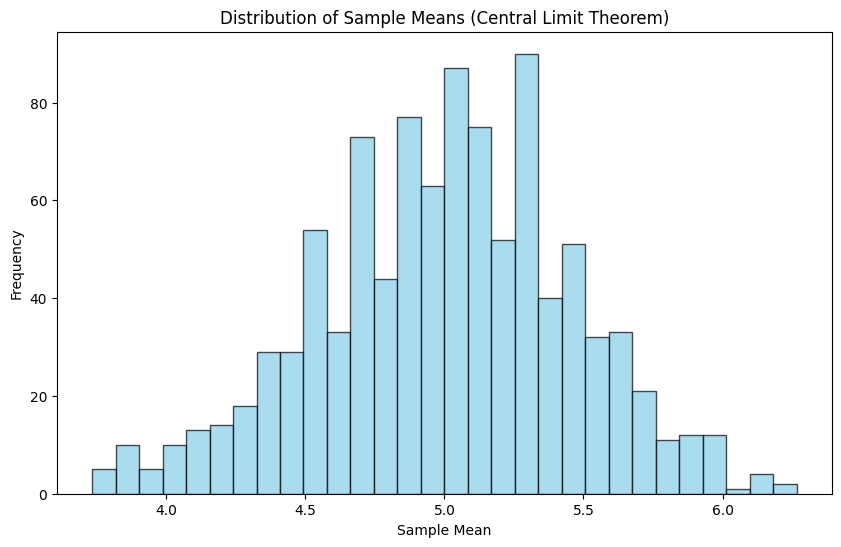

In [35]:
# plot distribution of sample mean
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means (Central Limit Theorem)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [36]:
# find cum means
n_values = np.arange(1, n_samples + 1)
cumulative_means = np.cumsum(sample_means) / n_values

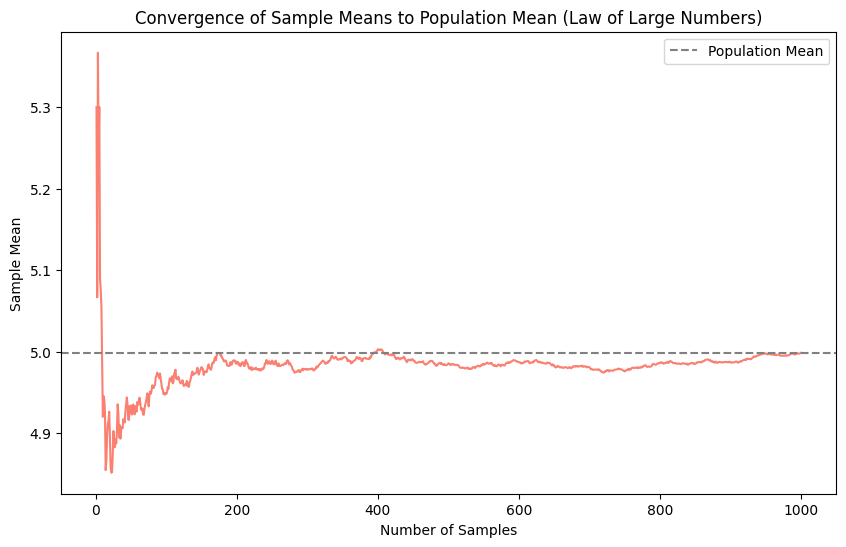

In [37]:
# line plot to show sample mean converge to population
plt.figure(figsize=(10, 6))
plt.plot(n_values, cumulative_means, color='salmon')
plt.axhline(y=np.mean(data), color='gray', linestyle='--', label='Population Mean')
plt.title('Convergence of Sample Means to Population Mean (Law of Large Numbers)')
plt.xlabel('Number of Samples')
plt.ylabel('Sample Mean')
plt.legend()
plt.show()

# as 2

In [38]:
# Load the dataset
movies_df = pd.read_csv('movies.csv')

# Selecting a column to analyze, for example 'Gross'
column_to_analyze = 'Gross'

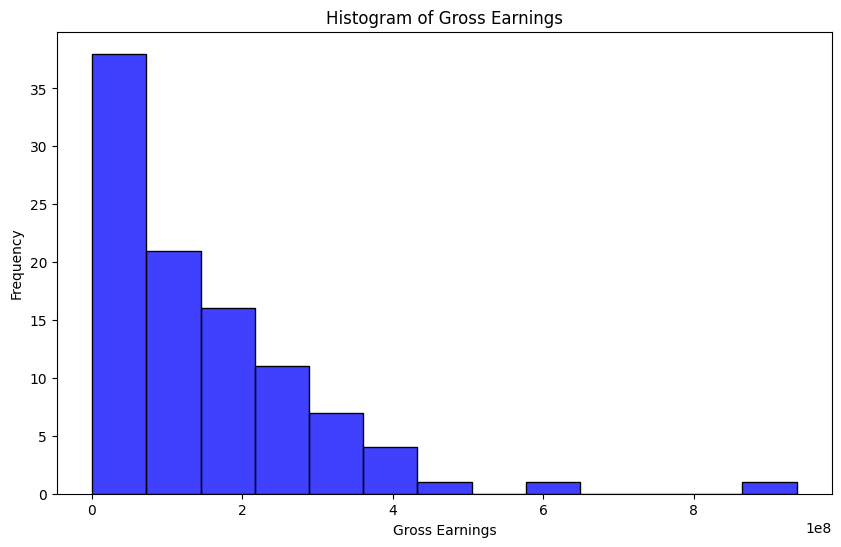

In [39]:
# Creating a histogram for the 'Gross' column
plt.figure(figsize=(10, 6))
sns.histplot(movies_df[column_to_analyze], kde=False, color='blue')
plt.title('Histogram of Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')
plt.show()

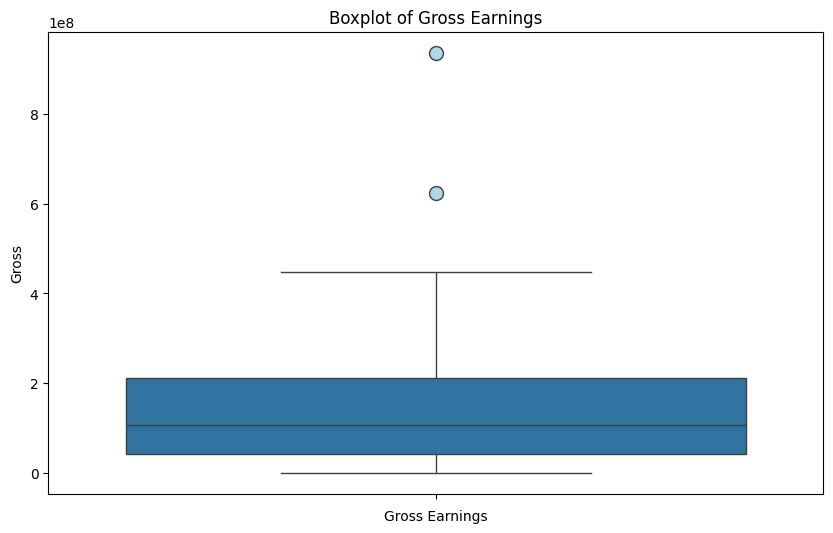

In [40]:
# Creating a boxplot for the 'Gross' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=movies_df[column_to_analyze], 
            flierprops=dict(marker='o', markerfacecolor='lightblue', markersize=10))
plt.title('Boxplot of Gross Earnings')
plt.xlabel('Gross Earnings')
plt.show()

In [41]:
# Identifying outliers using IQR
Q1 = movies_df[column_to_analyze].quantile(0.25)
Q3 = movies_df[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
movies_df_filtered = movies_df[(movies_df[column_to_analyze] >= lower_bound) & (movies_df[column_to_analyze] <= upper_bound)]


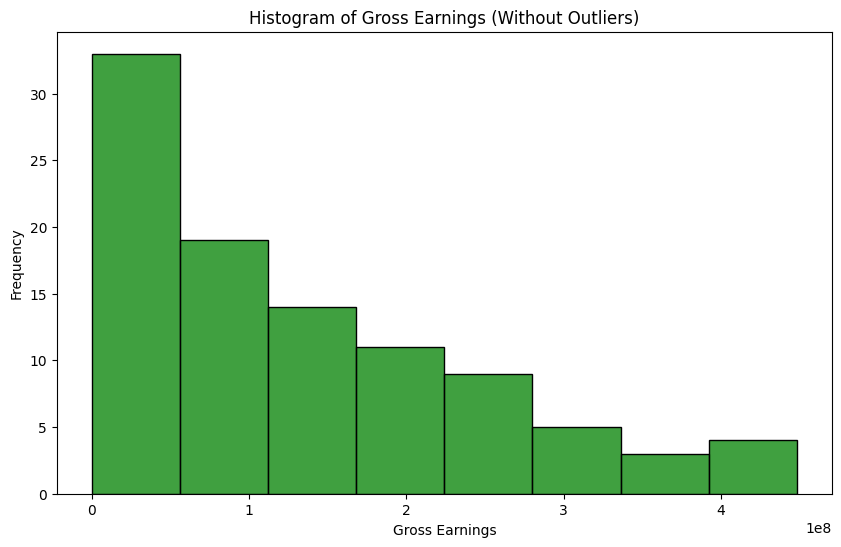

In [42]:
# Creating a histogram without outliers
plt.figure(figsize=(10, 6))
sns.histplot(movies_df_filtered[column_to_analyze], kde=False, color='green')
plt.title('Histogram of Gross Earnings (Without Outliers)')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')
plt.show()

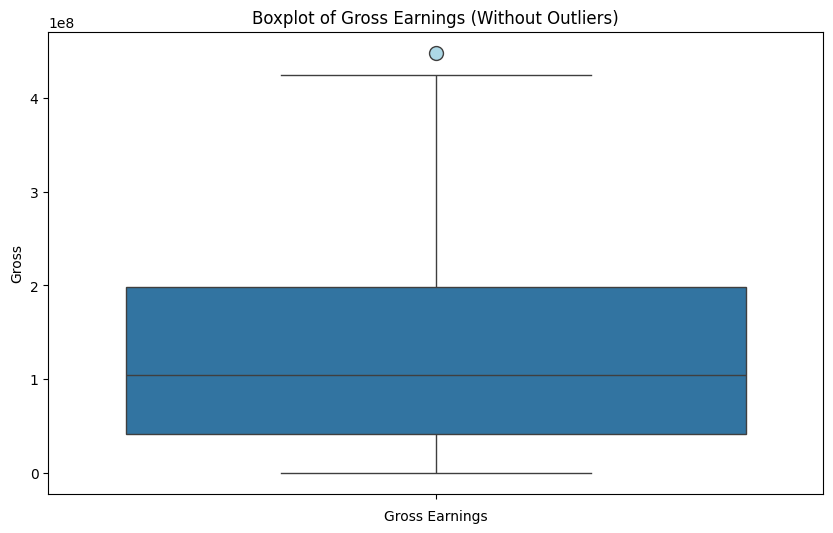

In [43]:
# Creating a boxplot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=movies_df_filtered[column_to_analyze],
            flierprops=dict(marker='o', markerfacecolor='lightblue', markersize=10))
plt.title('Boxplot of Gross Earnings (Without Outliers)')
plt.xlabel('Gross Earnings')
plt.show()